# Logistic Regression: Cost Function and Gradient Implementation

In this coding exercise, you will be implementing the cost function and gradient function for linear regression. The cost function measures the error between the predicted values and the actual values, while the gradient function calculates the derivatives of the cost function with respect to the model parameters. You will use a synthetic dataset to test your code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Let's simulate some data
np.random.seed(0)

# Generate two clouds of points from normal distributions
n_samples = 1000

# Generate points for the first group
mean1 = [1, -1]
cov1 = [[1, 0], [0, 1]]
cloud1 = np.random.multivariate_normal(mean1, cov1, n_samples)

# Generate points for the second group
mean2 = [-1, 1]
cov2 = [[1, 0], [0, 1]]
cloud2 = np.random.multivariate_normal(mean2, cov2, n_samples)

# Combine the two groups to create the feature matrix X
X = np.vstack((cloud1, cloud2))

# Generate the target variable y
y = np.concatenate((np.zeros(n_samples), np.ones(n_samples)))

# TODO: Split the data into training and testing sets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

# Reshape the target variables. What is the -1 used for?
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 2)
y_train shape: (1600, 1)

X_test shape: (400, 2)
y_test shape: (400, 1)


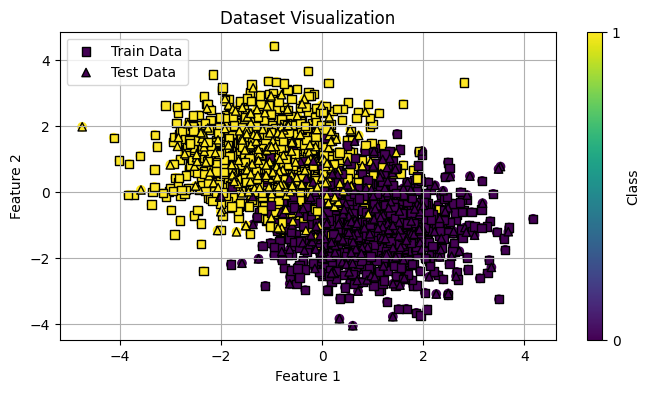

In [4]:
# Visualize the dataset
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(ticks=[0, 1], label='Class')
plt.grid(True)

# Plot train data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='black', linewidth=1, marker='s', label='Train Data')

# Plot test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='black', linewidth=1, marker='^', label='Test Data')

# Set legend
plt.legend()

# Show the plot
plt.show()

In [5]:
import numpy as np

# TODO: Import pyplot as plt from the matplotlib library

# TODO: Implement the predict function for logistic regression
def predict(X, theta):
    """
    Predict the target variable using the logistic regression model.
    
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, p), where n is the number of samples and p is the number of features.
    theta (numpy.ndarray): Model parameters of shape (p, 1).
    
    Returns:
    probabilities (numpy.ndarray): Predicted probabilities of shape (n, 1).
    """
    
    z = X @ theta
    probabilities = 1 / (1 + np.exp(-z))
    
    return probabilities


# TODO: Implement the cost function for logistic regression
def cost_function(X, y, theta):
    """
    Compute the cost function for logistic regression.
    
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, p), where n is the number of samples and p is the number of features.
    y (numpy.ndarray): Target values of shape (n, 1).
    theta (numpy.ndarray): Model parameters of shape (p, 1).
    
    Returns:
    cost (float): Cost value corresponding to the logistic loss.
    """
    
    n = len(y)
    
    probabilities = predict(X, theta)
    
    cost = -(1 / n) * (y.T @ np.log(probabilities) + (1 - y).T @ np.log(1 - probabilities))
    
    return cost


# TODO: Implement the gradient function for logistic regression
def gradient_function(X, y, theta):
    """
    Compute the gradient of the cost function for logistic regression.
    
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, p), where n is the number of samples and p is the number of features.
    y (numpy.ndarray): Target values of shape (n, 1).
    theta (numpy.ndarray): Model parameters of shape (p, 1).
    
    Returns:
    gradient (numpy.ndarray): Gradient vector of shape (p, 1).
    """
    
    n = len(y)
    
    probabilities = predict(X, theta)
    
    gradient = (1 / n) * X.T @ (probabilities - y)
    
    return gradient


# TODO: Implement the train function to learn the weights of the logistic regression model using gradient descent
def train_model(X_train, y_train, learning_rate, num_iterations):
    """
    Train the logistic regression model using gradient descent optimization.
    
    Parameters:
    X_train (numpy.ndarray): Feature matrix of shape (n, p) for training data.
    y_train (numpy.ndarray): Target values of shape (n, 1) for training data.
    learning_rate (float): Learning rate for gradient descent.
    num_iterations (int): Number of iterations for training.
    
    Returns:
    theta (numpy.ndarray): Model parameters of shape (p, 1).
    costs_train (list): List of training costs at each iteration.
    """
    
    n, p = X_train.shape
    theta = np.zeros((p, 1))
    costs_train = []
    
    for _ in range(num_iterations):
        gradient = gradient_function(X_train, y_train, theta)
        theta -= learning_rate * gradient
        
        cost_train = cost_function(X_train, y_train, theta)
        costs_train.append(cost_train[0, 0])
        
    return theta, costs_train

In [6]:
# Generate artificial data for demonstration
np.random.seed(0)

# Train the logistic regression model
learning_rate = 0.01
num_iterations = 5000
theta_hat, costs_train = train_model(X_train, y_train, learning_rate, num_iterations)

# Make predictions on the training data
probability_threshold = 1/2

probabilities_train = predict(X_train, theta_hat)
probabilities_test = predict(X_test, theta_hat)

y_train_pred = (probabilities_train >= probability_threshold).astype(int)
y_test_pred = (probabilities_test >= probability_threshold).astype(int)

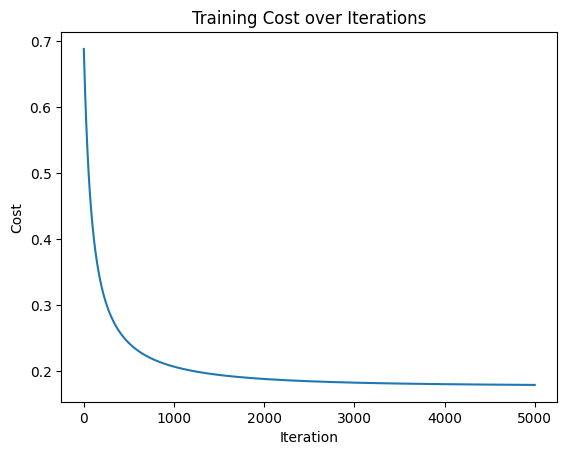

In [7]:
# TODO: Plot the training costs
plt.plot(costs_train)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Training Cost over Iterations')
plt.show()

In [8]:
# TODO: Define the precision function
def precision(y_true, y_pred):
    """
    Compute the precision score for binary classification.

    Parameters:
    y_true (numpy.ndarray): True target values of shape (n,).
    y_pred (numpy.ndarray): Predicted target values of shape (n,).

    Returns:
    precision (float): Precision score.
    """
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    precision = true_positives / (true_positives + false_positives)
    
    return precision

# TODO: Define the accuracy function
def accuracy(y_true, y_pred):
    """
    Compute the accuracy score for binary classification.

    Parameters:
    y_true (numpy.ndarray): True target values of shape (n,).
    y_pred (numpy.ndarray): Predicted target values of shape (n,).

    Returns:
    accuracy (float): Accuracy score.
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    
    return accuracy

In [9]:
# Compute precision for the training dataset
train_precision = precision(y_train, y_train_pred)

# Compute precision for the test dataset
test_precision = precision(y_test, y_test_pred)

# Compute accuracy for the training dataset
train_accuracy = accuracy(y_train, y_train_pred)

# Compute accuracy for the test dataset
test_accuracy = accuracy(y_test, y_test_pred)

# Print the results
print("Training Precision:", train_precision)
print("Training Accuracy:", train_accuracy)
print("Test Precision:", test_precision)
print("Test Accuracy:", test_accuracy)

# What are your conclusions?

Training Precision: 0.9154411764705882
Training Accuracy: 0.92375
Test Precision: 0.9095477386934674
Test Accuracy: 0.9075


In [10]:
def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate the confusion matrix for binary classification.

    Parameters:
    y_true (numpy.ndarray): True target values of shape (n,).
    y_pred (numpy.ndarray): Predicted target values of shape (n,).

    Returns:
    confusion_matrix (numpy.ndarray): Confusion matrix of shape (2, 2).
    """
    true_positive = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    true_negative = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    false_positive = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    false_negative = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    confusion_matrix = np.array([[true_negative, false_positive], [false_negative, true_positive]])
    return confusion_matrix


def plot_confusion_matrix(cm, classes, title):
    """
    Plot the confusion matrix.
    
    Parameters:
    cm (numpy.ndarray): Confusion matrix.
    classes (list): List of class labels.
    title (str): Title of the plot.
    """
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar(shrink=0.37)
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

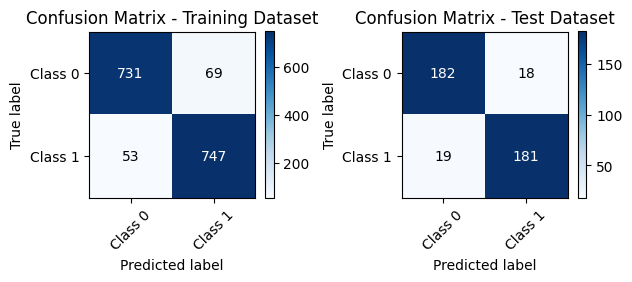

In [11]:
# Compute the confusion matrix for the training dataset
train_cm = calculate_confusion_matrix(y_train, y_train_pred)

# Compute the confusion matrix for the test dataset
test_cm = calculate_confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the training dataset
plt.subplot(1, 2, 1)
plot_confusion_matrix(train_cm, classes=['Class 0', 'Class 1'], title='Confusion Matrix - Training Dataset')

# Plot the confusion matrix for the test dataset
plt.subplot(1, 2, 2)
plot_confusion_matrix(test_cm, classes=['Class 0', 'Class 1'], title='Confusion Matrix - Test Dataset')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Training Confusion Matrix
Test Confusion Matrix


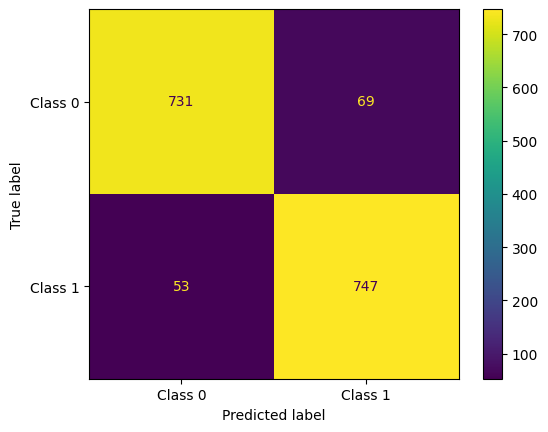

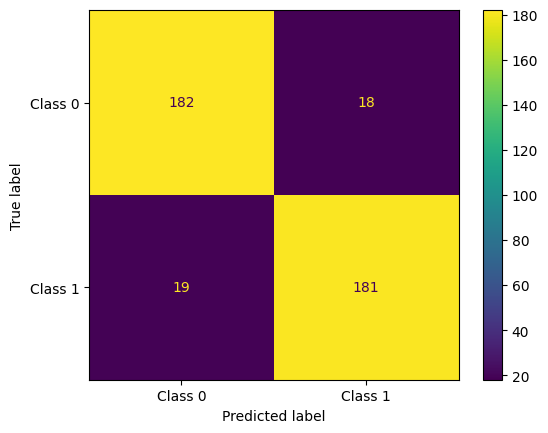

In [12]:
# Or Use Sklearn's implementation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix for the training dataset
train_cm = confusion_matrix(y_train, y_train_pred)

# Compute the confusion matrix for the test dataset
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the training dataset
print("Training Confusion Matrix")
ConfusionMatrixDisplay(train_cm, display_labels=['Class 0', 'Class 1']).plot()

# Plot the confusion matrix for the test dataset
print("Test Confusion Matrix")
ConfusionMatrixDisplay(test_cm, display_labels=['Class 0', 'Class 1']).plot()

# Logistic Regression:  Breast cancer case study

In this exercise, we will fit logistic regression using our implementation and compare it that provided by scikit-learn. We will use the Breast Cancer Wisconsin dataset, split it into training and testing sets, and then train and evaluate the models' performance using precision and accuracy.

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the target variables. What is the -1 used for?
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [14]:
# What is the dataset about? print data.DESCR
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [15]:
# Train the logistic regression using custom implementation
learning_rate = 0.001
num_iterations = 1000
theta_hat, costs_train = train_model(X_train_scaled, y_train, learning_rate, num_iterations)

# Train the logistic regression using scikit-learn
# Create a logistic regression object
lr_sklearn = LogisticRegression()

# Train the model on the scaled training data
lr_sklearn.fit(X_train_scaled, y_train)

# Compute the predictions for both models
y_pred_custom = (predict(X_test_scaled, theta_hat) >= 1/2).astype(int)
y_pred_sklearn = lr_sklearn.predict(X_test_scaled).reshape(-1,1)

# Compute the precision and accuracy for both models
precision_custom = precision(y_test, y_pred_custom)
accuracy_custom = accuracy(y_test, y_pred_custom)

precision_sklearn = precision(y_test, y_pred_sklearn)
accuracy_sklearn = accuracy(y_test, y_pred_sklearn)

# Print the results
print("Custom Logistic Regression:")
print(f"Precision: {precision_custom}")
print(f"Accuracy: {accuracy_custom}")

print("\nScikit-learn Logistic Regression:")
print(f"Precision: {precision_sklearn}")
print(f"Accuracy: {accuracy_sklearn}")

Custom Logistic Regression:
Precision: 0.9857142857142858
Accuracy: 0.9736842105263158

Scikit-learn Logistic Regression:
Precision: 0.9722222222222222
Accuracy: 0.9736842105263158


C:\Ali shit\KAUST TA\IAI-24-CodingExercises\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
